In [422]:
import pandas as pd
from geopy.distance import geodesic

# Load dataset
def load_dataset(filepath):
    df = pd.read_csv(filepath)
    return df

# Display basic info about the dataset
def display_info(df):
    print("\nDataset Information:\n")
    df.info()
    print("\nFirst Few Rows:\n")
    print(df.head())

# Check for missing values and handle them
def handle_missing_values(df, missing_threshold=0.7):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values:\n", missing_values[missing_values > 0])

    # Drop columns with too many missing values
    df = df.dropna(thresh=len(df) * missing_threshold, axis=1)

    # Fill remaining missing values with median or mode
    df.fillna(df.median(numeric_only=True), inplace=True)
    df.fillna(df.mode().iloc[0], inplace=True)

    return df

# Filter rows above the 98th percentile of price for each room_type
def filter_outliers_by_room_type(df, quantile=0.95):
    # Calculate the 98th percentile of price for each room_type
    percentiles = df.groupby('room_type')['price'].quantile(quantile)

    # Filter the DataFrame to exclude rows above the 98th percentile for each room_type
    filtered_df = df[df.apply(lambda row: row['price'] <= percentiles[row['room_type']], axis=1)]

    return filtered_df



Missing Values:
 last_review          16780
reviews_per_month    16780
dtype: int64


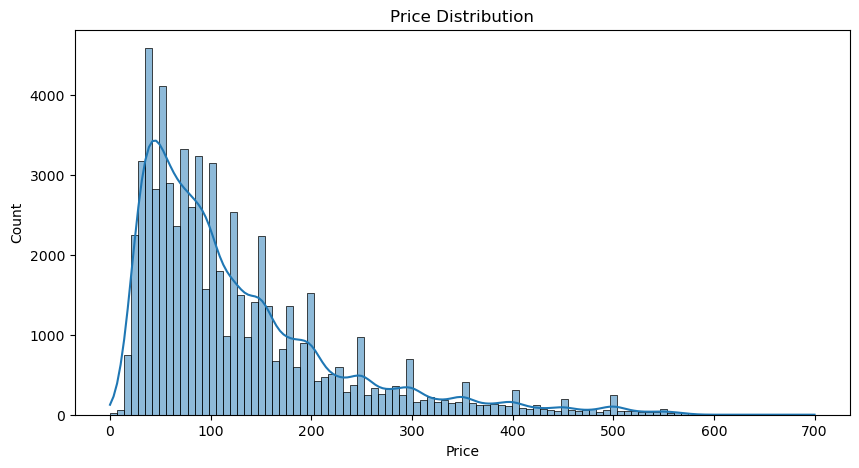

In [423]:
import matplotlib.pyplot as plt
import seaborn as sns


filepath = "listingss.csv"
df = load_dataset(filepath)


#display_info(df)


df = handle_missing_values(df)
df_raw=df
    # Filter outliers by room_type
df = filter_outliers_by_room_type(df)

df.head()


# Plot price distribution
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


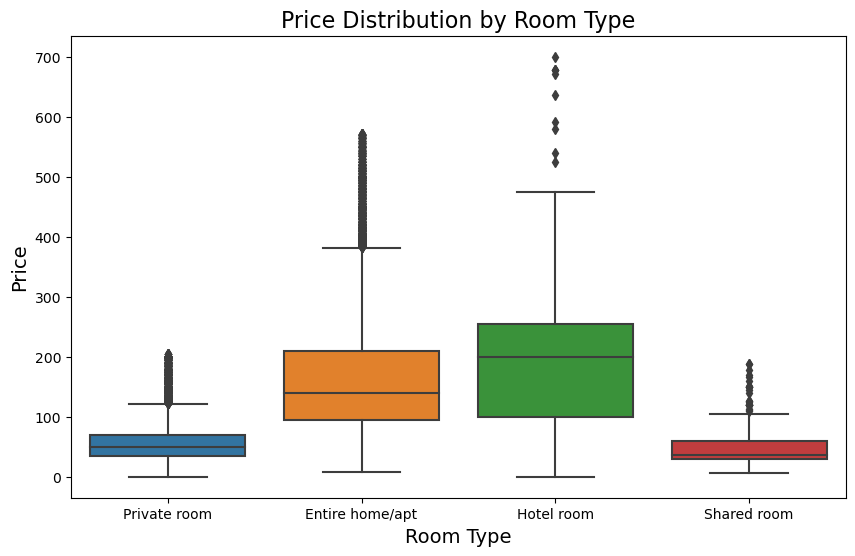

In [424]:


# Create a boxplot for prices by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)

# Add titles and labels
plt.title('Price Distribution by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show the plot
plt.show()


In [425]:
london_center = (51.494720, -0.135278)
# Apply to all rows in your DataFrame
df['distance_to_center'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), london_center).km,
    axis=1
)

# Check the first few distances
print(df[['latitude', 'longitude', 'distance_to_center']].head())


   latitude  longitude  distance_to_center
0  51.52874   -0.05396            6.796748
1  51.56861   -0.11270            8.368850
2  51.52851   -0.07426            5.663676
3  51.52478   -0.10484            3.956090
4  51.51464   -0.20004            5.013145


C:\Users\jpd17\AppData\Local\Temp\ipykernel_16796\1360916392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_center'] = df.apply(


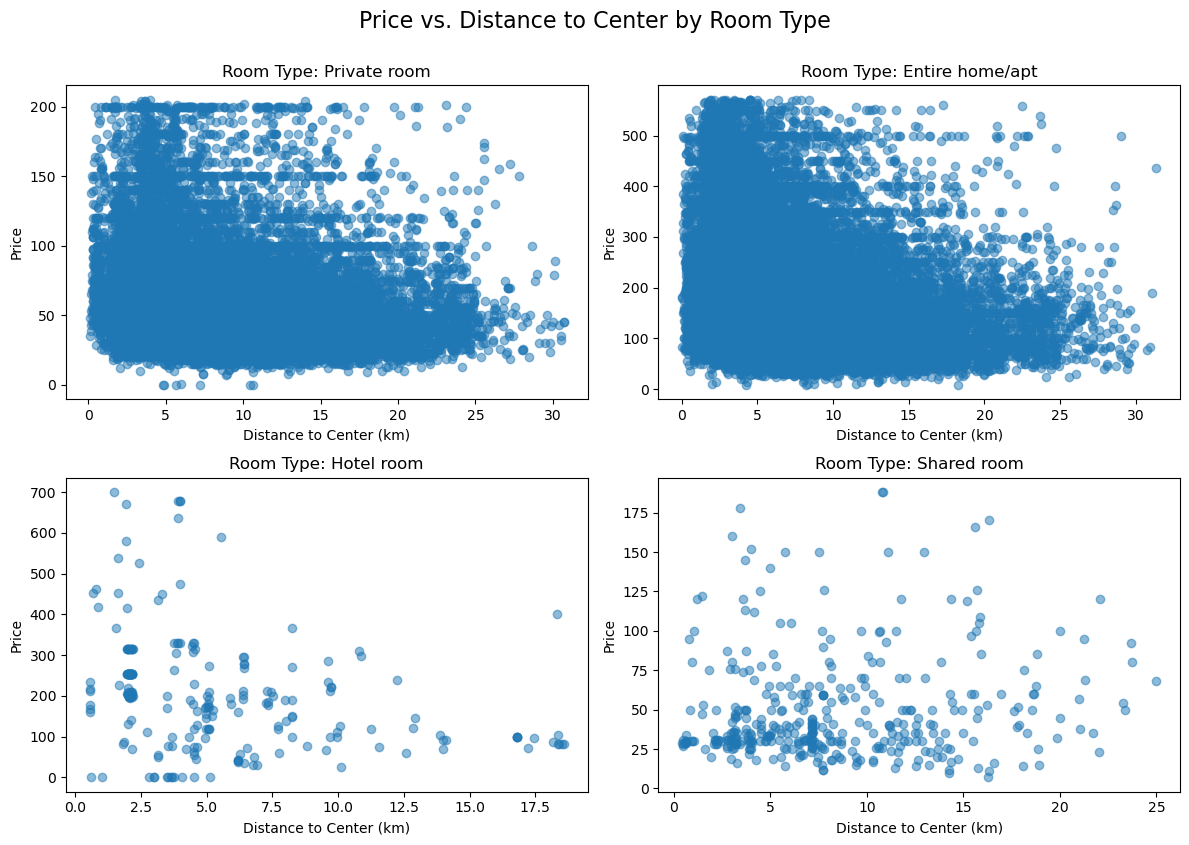

In [426]:
import matplotlib.pyplot as plt

# Get unique room types
room_types = df['room_type'].unique()

# Create a scatter plot for each room type
plt.figure(figsize=(12, 8))
for i, room_type in enumerate(room_types, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    subset = df[df['room_type'] == room_type]
    plt.scatter(subset['distance_to_center'], subset['price'], alpha=0.5)
    plt.title(f"Room Type: {room_type}")
    plt.xlabel("Distance to Center (km)")
    plt.ylabel("Price")
    plt.tight_layout()

# Show the plots
plt.suptitle("Price vs. Distance to Center by Room Type", fontsize=16, y=1.05)
plt.show()


C:\Users\jpd17\AppData\Local\Temp\ipykernel_16796\4066827087.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset.corr()


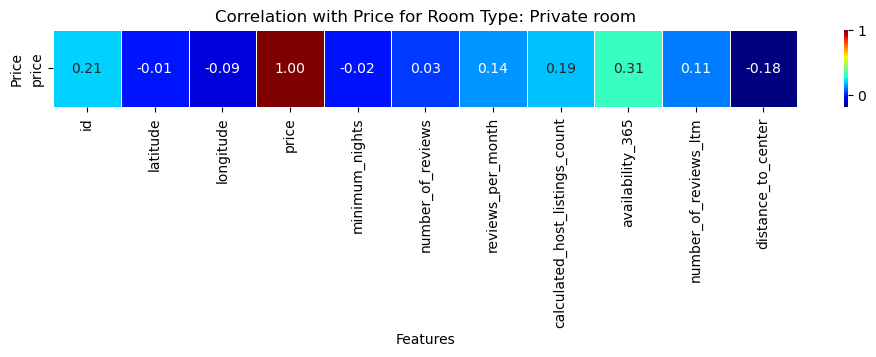

C:\Users\jpd17\AppData\Local\Temp\ipykernel_16796\4066827087.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset.corr()


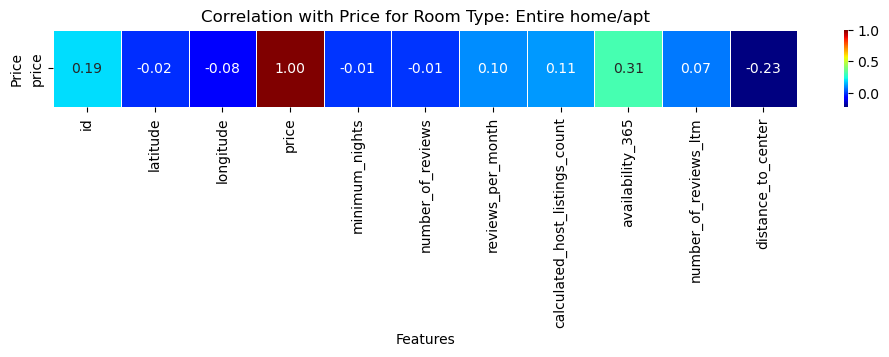

C:\Users\jpd17\AppData\Local\Temp\ipykernel_16796\4066827087.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset.corr()


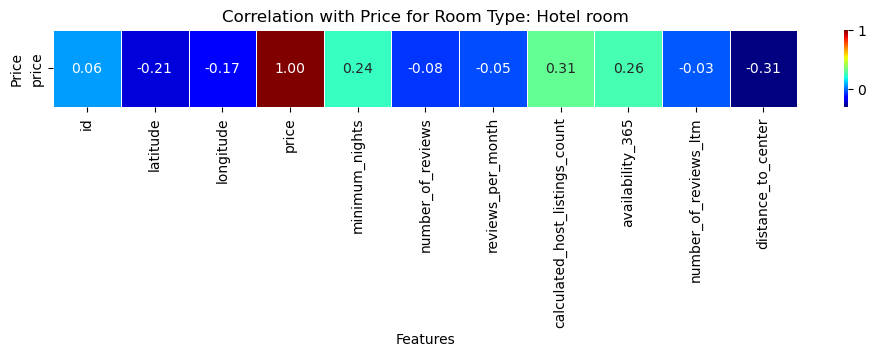

C:\Users\jpd17\AppData\Local\Temp\ipykernel_16796\4066827087.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset.corr()


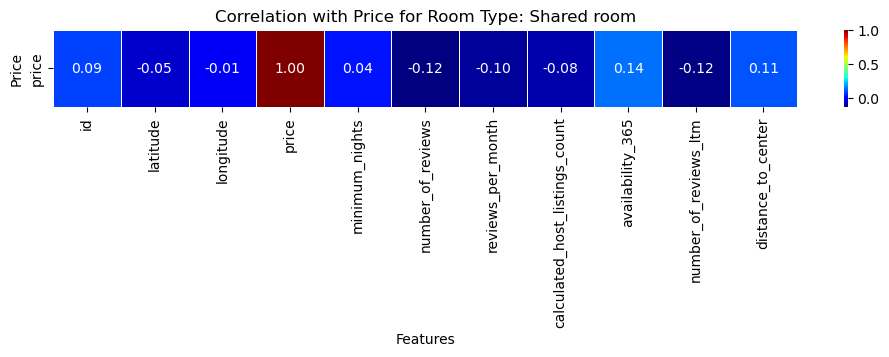

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'room_type' exists
if 'room_type' in df.columns:
    unique_room_types = df['room_type'].unique()  # Get all unique room types
    
    # Create separate plots for each room type
    for room_type in unique_room_types:
        # Filter data by room type
        subset = df[df['room_type'] == room_type]
        
        # Compute correlation matrix
        correlation_matrix = subset.corr()
        
        # Select only the row for 'price'
        price_correlation = correlation_matrix.loc[['price']]
        
        # Plot heatmap
        plt.figure(figsize=(12, 1))  # Adjust figure height to show a single row
        sns.heatmap(price_correlation, annot=True, cmap="jet", fmt=".2f", linewidths=0.5, cbar=True)
        plt.title(f"Correlation with Price for Room Type: {room_type}")
        plt.xlabel("Features")
        plt.ylabel("Price")
        plt.show()
else:
    print("Column 'room_type' not found in the dataset.")


In [428]:
# Keep the original 'room_type' column and one-hot encode categorical columns
df = pd.get_dummies(df, columns=['neighbourhood'], drop_first=False)

# Retain 'room_type' as a separate feature
df['type'] = df['room_type']

# One-hot encode the 'room_type' column while keeping the original
df = pd.get_dummies(df, columns=['room_type'], drop_first=False)

# Define feature and target variables
X = df[[
    'calculated_host_listings_count',
    'availability_365',
    'reviews_per_month',
    'distance_to_center',  # Consider only if non-linear relationships might help
] + 
       [col for col in df.columns if 'room_type' in col or 'neighbourhood' in col]]
y = df['price']

In [429]:
X

,calculated_host_listings_count,availability_365,reviews_per_month,distance_to_center,neighbourhood_Barking and Dagenham,neighbourhood_Barnet,neighbourhood_Bexley,neighbourhood_Brent,neighbourhood_Bromley,neighbourhood_Camden,neighbourhood_City of London,neighbourhood_Croydon,neighbourhood_Ealing,neighbourhood_Enfield,neighbourhood_Greenwich,neighbourhood_Hackney,neighbourhood_Hammersmith and Fulham,neighbourhood_Haringey,neighbourhood_Harrow,neighbourhood_Havering,neighbourhood_Hillingdon,neighbourhood_Hounslow,neighbourhood_Islington,neighbourhood_Kensington and Chelsea,neighbourhood_Kingston upon Thames,neighbourhood_Lambeth,neighbourhood_Lewisham,neighbourhood_Merton,neighbourhood_Newham,neighbourhood_Redbridge,neighbourhood_Richmond upon Thames,neighbourhood_Southwark,neighbourhood_Sutton,neighbourhood_Tower Hamlets,neighbourhood_Waltham Forest,neighbourhood_Wandsworth,neighbourhood_Westminster,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,74,0.47,6.796748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2,343,0.20,8.368850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,222,0.34,5.663676,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,5,236,3.59,3.956090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,180,0.05,5.013145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,3,0,0.84,8.561051,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
69347,1,0,0.99,2.817648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
69348,1,4,1.49,18.101629,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
69349,1,2,0.61,18.212901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [442]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 45.86299556981694
Mean Squared Error: 4822.995926417771
R² Score: 0.5154279779141254


In [446]:
print(X_test[room_type_columns].sum())


room_type_Entire home/apt    7921
room_type_Hotel room           35
room_type_Private room       5137
room_type_Shared room          85
dtype: int64


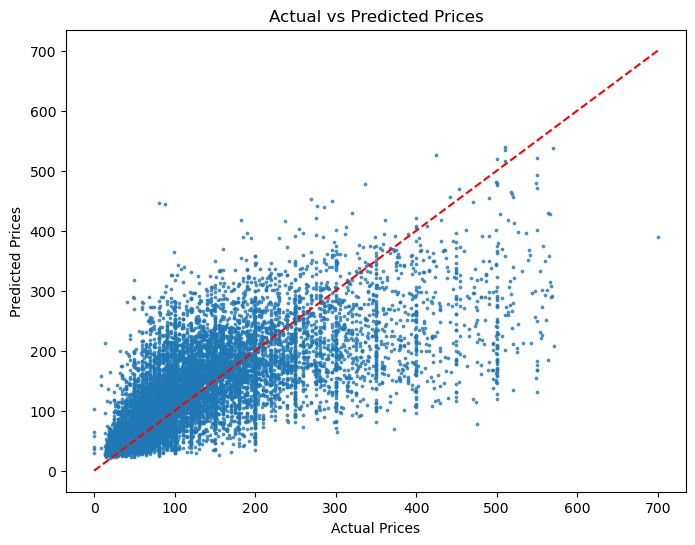

125.5142662012445

In [447]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7,s=3)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.show()
y_test.mean()

In [391]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300,400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [448]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model with best parameters
optimized_model = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Train the model
optimized_model.fit(X_train, y_train)

# Make predictions
y_pred = optimized_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 46.27862445083114
Mean Squared Error: 4792.55311195102
R² Score: 0.5184866029656907


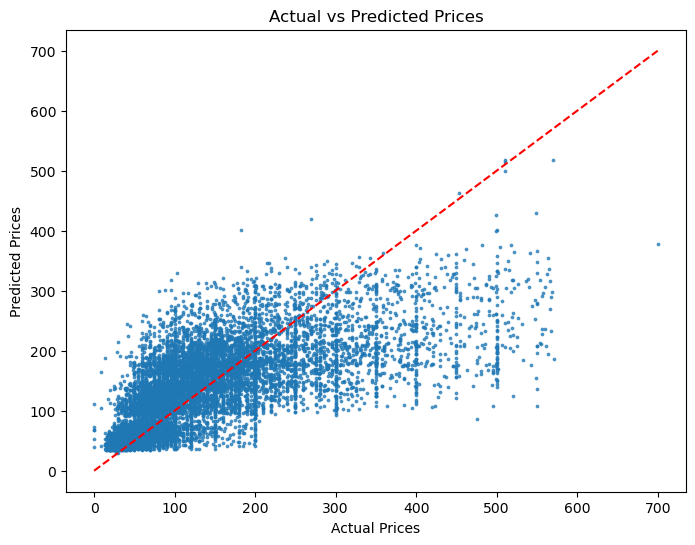

125.5142662012445

In [449]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7,s=3)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.show()
y_test.mean()

         room_type        mae           mse        r2
0  Entire home/apt  63.896927   7435.396401  0.302184
1       Hotel room  63.993035  10581.188885  0.506986
2     Private room  19.349115    739.655626  0.337145
3      Shared room  24.658766   1065.146500  0.129835


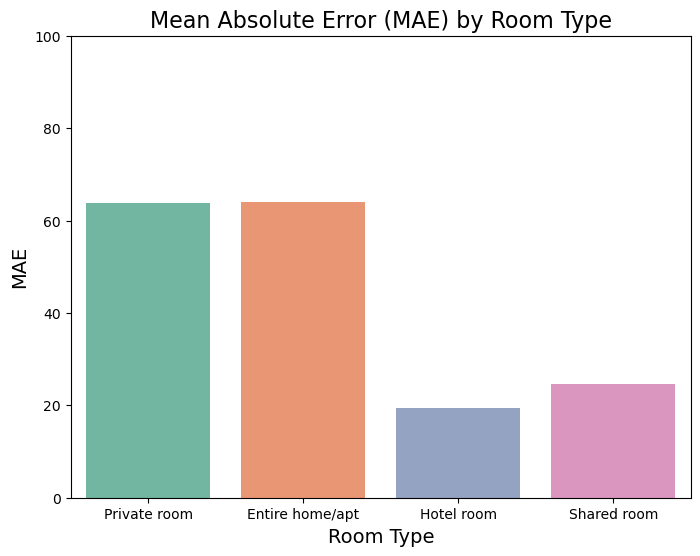

In [454]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# List of one-hot encoded room type columns
room_type_columns = [col for col in X_test.columns if col.startswith('room_type_')]

# Create a DataFrame to store metrics for each room type
room_type_metrics = []

# Iterate over each one-hot encoded room type column
for room_type_col in room_type_columns:
    # Create a mask for the current room type
    room_type_mask = X_test[room_type_col] == 1  # Select rows where this room type is active
    
    # Filter y_test and y_pred for the current room type
    y_test_room = y_test[room_type_mask]
    y_pred_room = y_pred[room_type_mask]
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_room, y_pred_room)
    mse = mean_squared_error(y_test_room, y_pred_room)
    r2 = r2_score(y_test_room, y_pred_room)
    
    # Append the results
    room_type_metrics.append({
        'room_type': room_type_col.replace('room_type_', ''),  # Remove prefix for readability
        'mae': mae,
        'mse': mse,
        'r2': r2
    })

# Convert to a DataFrame for easy viewing
metrics_df = pd.DataFrame(room_type_metrics)

# Display the results
print(metrics_df)
plt.figure(figsize=(8, 6))
sns.barplot(x=room_types, y=metrics_df['mae'], palette='Set2')

# Add labels and title
plt.title('Mean Absolute Error (MAE) by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.ylim(0,100)
# Show the plot
plt.show()